In [1]:
import numpy as np
from matplotlib import pyplot as plt 

T_1 = np.array([50.8, 40.5, 35.6, 31.1, 28.5, 27.6, 26.3, 25.8, 21.8])
T_2 = np.array([60.8, 47.8, 40.1, 33.8, 30.1, 28.6, 26.8, 26.3, 22])
T_3 = np.array([84.2, 63.3, 50.5, 40.8, 35.0, 32.0 , 29.3, 29.2, 22])

u_1, u_2, U_3 = 9, 12, 5
i_1, i_2, i_3 = 1/3, 0.43, None
l = 5

# Functional aproach


In [2]:
def T_M (T):
    s = 0
    for i in T[1:-2]:
        s += i *5
    s += (T[0] + T[-1]) * 5/2
    return s/ 35 + 273.15
def T_F (T):
    return T[-1] + 273.15
def alph_conv(T_s, T_f):
    return 1.316*((T_s-T_f)/0.01)**0.25
def alph_rad(T_s, T_f):
    return 0.95* 5.67* 10**(-8) *(T_s**4 - T_f**4)/(T_s-T_f)
def alph_tot(alph_conv, alph_rad):
    return alph_rad + alph_conv
def flux_Q(T_s, T_f, alph_tot):
    return alph_tot*(T_s - T_f)* (np.pi*0.01*0.35)

def calcule (T):
    T_s = T_M(T)
    T_f = T_F(T)
    Alph_conv = alph_conv (T_s, T_f)
    Alph_rad = alph_rad (T_s, T_f)
    Alph_tot = alph_tot (Alph_conv, Alph_rad)
    Flux_Q = flux_Q (T_s, T_f, Alph_tot)
    return( T_s, T_f, Alph_conv, Alph_rad, Alph_tot, Flux_Q)


In [3]:
calcule_1 = calcule (T_1)
calcule_2 = calcule (T_2)
calcule_3 = calcule (T_3)
print (calcule_1) 
print (calcule_2) 
print (calcule_3)

(305.4214285714286, 294.95, 7.486130144322247, 5.830003468692731, 13.316133613014978, 1.5332112450796136)
(308.6642857142857, 295.15, 7.9791046917465795, 5.93204337437496, 13.91114806612154, 2.0671594948440437)
(316.5785714285714, 295.15, 8.953734122453303, 6.172847480399709, 15.126581602853012, 3.5641168228087183)


# Class Aproach

In [4]:
class Calcule_flux_bara:
    def __init__(self, T, L):
        self.T = T
        self.L = L
    def __repr__(self):
        return f"{self.T}, {self.L}"
    
    @property
    def Tm(self):
        self.s = 0
        for i in self.T[1:-2]: 
            self.s += i * 0.05 
        self.s += (self.T[0] + self.T[-1]) * 0.025
        return self.s / 0.35 + 273.15
    
    @property
    def Tf(self):
        return self.T[-1] + 273.15
    
    @property
    def alpha_conv(self):
        return 1.316 * ((self.Tm - self.Tf) / 0.01) ** 0.25
    
    @property
    def alpha_rad(self):
        return 0.95* 5.67* 10**(-8) * (self.Tm**4 - self.Tf**4) / (self.Tm - self.Tf)
    
    @property
    def alpha_tot(self):
        return self.alpha_rad + self.alpha_conv
    
    @property
    def flux_Q(self):
        return self.alpha_tot*(self.Tm - self.Tf) * (np.pi*0.01*0.35)

In [5]:
c1= Calcule_flux_bara(T_1, 0.35)

print(Temperatura medie este:'',c1.Tm)
print(c1.Tf)
print(c1.alpha_conv)
print(c1.alpha_rad)
print(c1.alpha_tot)
print(c1.flux_Q)

Temperatura medie este: 305.4214285714286
294.95
7.486130144322247
5.830003468692731
13.316133613014978
1.5332112450796136


## Grafice temperaturi & Dataframes

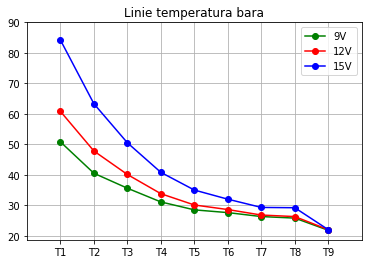

In [6]:
x = np.linspace(10, 90, 9)
y = np.linspace(20, 90, 8) 

y1 = np.array(T_1)
y2 = np.array(T_2)
y3 = np.array(T_3)


plt.plot(x, y1, color = "green", marker='o', label = "9V")
plt.plot(x, y2, color = "red", marker='o', label = "12V")
plt.plot(x, y3, color = "blue", marker='o', label = "15V")

plt.xticks( x, ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"] )
plt.yticks( y )


plt.legend()
plt.grid(True)
plt.xlim(min(x)-10, max(x) + 10 )
plt.title("Linie temperatura bara")

plt.show()
